In [277]:
print("Main Question")
print("quote: In this challenge, we encourage you to explore new ways of measuring fatigue and examine its effects on players’ performance and physical wellness")
print(" ")
print("")
print("Issues to Consider:")
print("1: How reliable are subjective wellness data? Can you quantify the individual variation in self-reported data and use this to adjust measures of wellness?")
print("")
print("2: Should the quality of the opponent or the outcome of the game be considered when examining fatigue during a game?")
print("")
print("3: Some accepted (and even widely used) measurements of training load or fatigue arenaive. For example, you'll find in these data a Monitoring Score which simply sums the values of other subjective scores in an attempt to create a single overall measure of fatigue. Is a simple sum useful? Or can it be improved? For example, are all components of this Monitoring Score needed? Are some more important than others, and why?")
print("")
print("4: Be wary of missing variables. Most often they indicate that a player simply did not provide information or that sensors were not functioning. But in some situations values are missing because they are not meaningful in a certain context. You'll find that a onesize-fits-all approach is not useful. ")
print("")
print("5: You will find it tempting to use the location data to help inform on-field strategy. We advise against this because it is unlikely to help you understand fatigue. The location data are provided in order to help you study fatigue. For example, it could be used to, verify hypotheses, or evaluate player fatigue in different positions (e.g., how does a player’s position contribute to their fatigue?).")
print("")
print("")
print("Variables of interest")
print("Games file------------------------")
print("GameID")
print("Date")
print("Outcome")
print("TeamPoints")
print("TeamPointsAllowed")
print("")
print("Wellness file----------------------")
print("Date")
print("PlayerID")


print("Soreness")
print("Menstruation")
print("Pain")
print("Illness")
print("BedTime")
print("WakeTime")
print("SleepHours")
print("SleepQuality")
print("Fatigue")
print("Desire")
print("Irritability")



print("Nutrition")
print("NutritionAdjustment")
print("TrainingReadiness")
print("")
print("RPE file----------------------------------")
print("Training")
print("SessionType") # conditioning, strength, speed, skills, mobility/recovery
print("Duration")
print("RPE")
print("AcuteLoad")
print("ChronicLoad")
print("AcuteChronicRatio")
print("ObjectiveRating")
print("FocusRating")
print("BestOutOfMyself")
print("")
print("GPS file-----------------------------------")
print("GameID")
print("PlayerID")
print("Speed")
print("AccelImpulse")
print("")
print("")
print("Fatigue = ?")
print("variables that might help to answer ? : ")
print("Games:")
print("    GameID Date Tournament correlated to : TournamentGame, Opponent Outcome TeamPoints TeamPointsAllowed")
print("    Games is where we plan to apply our method for checking fatigue to check how accurately it predicts win loss etc. Also look for relationship between game number order in tournament, and winning. how does first game affect odds of winning or lossing in next and so on")
print("    ")
print("Wellness:")
print("    Date PlayerID Fatigue correlated to: Soreness SleepHours SleepQuality Menstruation USGMeasurement USG Pain Illness")
print("    Wellness is what we plan to use to create a method for measuring fatigue other then just using the fatigue measurement value. We can then compare this with games won or lost to determine the affect each value has and the importance.")
print("    ")
print("RPE")
print("    Date PlayerID Training SessionType Duration compared to fatigue or to how well they play etc. does it make them lose more or have any correlation with winning or losing")
print("    ")
print("    ")


Main Question
quote: In this challenge, we encourage you to explore new ways of measuring fatigue and examine its effects on players’ performance and physical wellness
 

Issues to Consider:
1: How reliable are subjective wellness data? Can you quantify the individual variation in self-reported data and use this to adjust measures of wellness?

2: Should the quality of the opponent or the outcome of the game be considered when examining fatigue during a game?

3: Some accepted (and even widely used) measurements of training load or fatigue arenaive. For example, you'll find in these data a Monitoring Score which simply sums the values of other subjective scores in an attempt to create a single overall measure of fatigue. Is a simple sum useful? Or can it be improved? For example, are all components of this Monitoring Score needed? Are some more important than others, and why?

4: Be wary of missing variables. Most often they indicate that a player simply did not provide information or 

In [278]:
import pandas as pd

In [279]:
df_games = pd.read_csv("data_file\Data\games.csv", header=0)

In [280]:
df_gps = pd.read_csv("data_file\Data\gps.csv", header=0)

In [281]:
df_rpe = pd.read_csv("rpe.csv", header=0)

In [282]:
df_wellness = pd.read_csv("data_file\Data\wellness.csv", header=0)

In [283]:
df_games.head(40)

,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
0,1,2017-11-30,Dubai,1,Canada,Spain,W,19,0
1,2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
2,3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
3,4,2017-12-01,Dubai,4,Canada,France,W,24,19
4,5,2017-12-01,Dubai,5,Canada,Australia,L,7,25
5,6,2017-12-01,Dubai,6,Canada,Russia,L,5,10
6,7,2018-01-26,Sydney,1,Canada,Fiji,W,24,12
7,8,2018-01-26,Sydney,2,Canada,Ireland,W,24,12
8,9,2018-01-26,Sydney,3,Canada,Russia,W,19,5
9,10,2018-01-27,Sydney,4,Canada,France,W,28,12


In [284]:
df_gps.head()

,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
0,1,1,2,1,00:22:01,00:00:00,0.658334,0.611112,0.005330,0.13250,0.69875,0.56500,55.466666,24.994873
1,1,1,2,2,00:22:01,00:00:00,0.594445,0.638889,0.006568,0.11125,0.92000,0.70625,55.466666,24.994874
2,1,1,2,3,00:22:01,00:00:00,0.363889,2.305557,0.003114,0.01375,0.77000,0.67750,55.466667,24.994874
3,1,1,2,4,00:22:01,00:00:00,0.444445,0.805556,0.002602,0.00625,0.88625,0.59500,55.466667,24.994874
4,1,1,2,5,00:22:01,00:00:00,0.400000,0.444445,0.003813,-0.01750,0.85750,0.57375,55.466668,24.994874


In [285]:
df_rpe.head(50)

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely
5,2018-07-20,11,Yes,Mobility/Recovery,15.0,2.0,30.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely
6,2018-07-20,13,Yes,Game,27.0,6.0,162.0,306.0,259.4,287.32,0.90,NaN,NaN,Not at all
7,2018-07-20,13,Yes,Game,24.0,6.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
8,2018-07-20,13,Yes,Mobility/Recovery,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
9,2018-07-19,1,Yes,Skills,60.0,3.0,180.0,180.0,87.9,140.54,0.63,NaN,NaN,NaN


In [286]:
df_wellness.head(20)

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,No,NaN,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%
5,2018-07-21,7,2,2,5,4,22:00:00,07:00:00,9.00,3,16,No,No,No,Excellent,Yes,Yes,1.014,95%
6,2018-07-21,10,2,2,4,4,22:30:00,05:45:00,7.25,3,15,No,Slightly Off,No,Excellent,Yes,Yes,1.017,70%
7,2018-07-21,11,4,3,6,4,23:00:00,07:00:00,8.00,3,20,No,Slightly Off,No,Excellent,Yes,Yes,1.013,100%
8,2018-07-21,13,4,3,5,4,23:15:00,07:15:00,8.00,4,20,No,No,No,Excellent,Yes,Yes,1.025,100%
9,2018-07-21,14,3,3,4,4,22:15:00,07:00:00,8.75,4,18,No,No,No,Excellent,Yes,Yes,1.015,100%


In [287]:
combined_RPE_WELL_df = pd.merge(df_rpe, df_wellness,  how='left', left_on=['Date','PlayerID'], right_on = ['Date','PlayerID'])

In [288]:
combined_RPE_WELL_df.describe()

,PlayerID,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,Fatigue,Soreness,Desire,Irritability,SleepHours,SleepQuality,MonitoringScore,USG
count,8860.000000,7621.000000,7621.000000,7621.000000,3149.000000,4349.000000,4383.000000,4349.000000,4724.000000,4751.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,1057.000000
mean,9.019187,55.656082,4.166907,252.703845,612.550969,316.266774,335.385311,1.051058,7.918078,8.123342,3.355437,3.341017,3.853783,3.945272,8.591903,3.755910,18.251418,1.023049
std,4.912426,26.753594,2.206222,195.200977,395.790918,164.226498,131.079818,0.684823,1.449064,1.447300,1.020200,0.993606,0.999830,0.794060,1.242172,1.110672,3.642238,0.030544
min,1.000000,2.000000,0.000000,0.000000,0.000000,3.100000,1.430000,0.010000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,6.000000,1.003000
25%,5.000000,33.000000,3.000000,120.000000,290.000000,188.600000,251.015000,0.640000,7.000000,8.000000,3.000000,3.000000,4.000000,4.000000,8.000000,3.000000,16.000000,1.014000
50%,9.000000,60.000000,4.000000,216.000000,580.000000,299.300000,334.290000,0.920000,8.000000,8.000000,3.000000,3.000000,4.000000,4.000000,8.500000,4.000000,18.000000,1.017000
75%,13.000000,75.000000,5.000000,360.000000,900.000000,432.100000,424.840000,1.270000,9.000000,9.000000,4.000000,4.000000,4.000000,4.000000,9.250000,4.000000,20.000000,1.020000
max,17.000000,245.000000,9.000000,1440.000000,2300.000000,790.700000,695.890000,4.020000,10.000000,10.000000,7.000000,7.000000,7.000000,7.000000,22.500000,7.000000,35.000000,1.200000


In [289]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [290]:
columns = list(combined_RPE_WELL_df) 
  
for i in columns: 
    print(i, combined_RPE_WELL_df[pd.isnull(combined_RPE_WELL_df[i])].shape[0] )

Date 0
PlayerID 0
Training 0
SessionType 1239
Duration 1239
RPE 1239
SessionLoad 1239
DailyLoad 5711
AcuteLoad 4511
ChronicLoad 4477
AcuteChronicRatio 4511
ObjectiveRating 4136
FocusRating 4109
BestOutOfMyself 5841
Fatigue 400
Soreness 400
Desire 400
Irritability 400
BedTime 400
WakeTime 400
SleepHours 400
SleepQuality 400
MonitoringScore 400
Pain 400
Illness 400
Menstruation 423
Nutrition 1725
NutritionAdjustment 1594
USGMeasurement 602
USG 7803
TrainingReadiness 400


In [291]:
def get_null_per_columns(df):
    columns = list(df) 
  
    for i in columns: 
        print('column name: ','[',i,']', 'number of nulls in col: ','[',df[pd.isnull(df[i])].shape[0],']', )

In [292]:
get_null_per_columns(combined_RPE_WELL_df)

column name:  [ Date ] number of nulls in col:  [ 0 ]
column name:  [ PlayerID ] number of nulls in col:  [ 0 ]
column name:  [ Training ] number of nulls in col:  [ 0 ]
column name:  [ SessionType ] number of nulls in col:  [ 1239 ]
column name:  [ Duration ] number of nulls in col:  [ 1239 ]
column name:  [ RPE ] number of nulls in col:  [ 1239 ]
column name:  [ SessionLoad ] number of nulls in col:  [ 1239 ]
column name:  [ DailyLoad ] number of nulls in col:  [ 5711 ]
column name:  [ AcuteLoad ] number of nulls in col:  [ 4511 ]
column name:  [ ChronicLoad ] number of nulls in col:  [ 4477 ]
column name:  [ AcuteChronicRatio ] number of nulls in col:  [ 4511 ]
column name:  [ ObjectiveRating ] number of nulls in col:  [ 4136 ]
column name:  [ FocusRating ] number of nulls in col:  [ 4109 ]
column name:  [ BestOutOfMyself ] number of nulls in col:  [ 5841 ]
column name:  [ Fatigue ] number of nulls in col:  [ 400 ]
column name:  [ Soreness ] number of nulls in col:  [ 400 ]
column n

In [293]:
get_null_per_columns(df_games)

column name:  [ GameID ] number of nulls in col:  [ 0 ]
column name:  [ Date ] number of nulls in col:  [ 0 ]
column name:  [ Tournament ] number of nulls in col:  [ 0 ]
column name:  [ TournamentGame ] number of nulls in col:  [ 0 ]
column name:  [ Team ] number of nulls in col:  [ 0 ]
column name:  [ Opponent ] number of nulls in col:  [ 0 ]
column name:  [ Outcome ] number of nulls in col:  [ 0 ]
column name:  [ TeamPoints ] number of nulls in col:  [ 0 ]
column name:  [ TeamPointsAllowed ] number of nulls in col:  [ 0 ]


In [294]:
get_null_per_columns(df_gps)

column name:  [ GameID ] number of nulls in col:  [ 0 ]
column name:  [ Half ] number of nulls in col:  [ 0 ]
column name:  [ PlayerID ] number of nulls in col:  [ 0 ]
column name:  [ FrameID ] number of nulls in col:  [ 0 ]
column name:  [ Time ] number of nulls in col:  [ 0 ]
column name:  [ GameClock ] number of nulls in col:  [ 0 ]
column name:  [ Speed ] number of nulls in col:  [ 0 ]
column name:  [ AccelImpulse ] number of nulls in col:  [ 0 ]
column name:  [ AccelLoad ] number of nulls in col:  [ 0 ]
column name:  [ AccelX ] number of nulls in col:  [ 0 ]
column name:  [ AccelY ] number of nulls in col:  [ 0 ]
column name:  [ AccelZ ] number of nulls in col:  [ 0 ]
column name:  [ Longitude ] number of nulls in col:  [ 1515243 ]
column name:  [ Latitude ] number of nulls in col:  [ 0 ]


In [295]:
get_null_per_columns(df_rpe)

column name:  [ Date ] number of nulls in col:  [ 0 ]
column name:  [ PlayerID ] number of nulls in col:  [ 0 ]
column name:  [ Training ] number of nulls in col:  [ 0 ]
column name:  [ SessionType ] number of nulls in col:  [ 1239 ]
column name:  [ Duration ] number of nulls in col:  [ 1239 ]
column name:  [ RPE ] number of nulls in col:  [ 1239 ]
column name:  [ SessionLoad ] number of nulls in col:  [ 1239 ]
column name:  [ DailyLoad ] number of nulls in col:  [ 5711 ]
column name:  [ AcuteLoad ] number of nulls in col:  [ 4511 ]
column name:  [ ChronicLoad ] number of nulls in col:  [ 4477 ]
column name:  [ AcuteChronicRatio ] number of nulls in col:  [ 4511 ]
column name:  [ ObjectiveRating ] number of nulls in col:  [ 4136 ]
column name:  [ FocusRating ] number of nulls in col:  [ 4109 ]
column name:  [ BestOutOfMyself ] number of nulls in col:  [ 5841 ]


In [296]:
get_null_per_columns(df_wellness)

column name:  [ Date ] number of nulls in col:  [ 0 ]
column name:  [ PlayerID ] number of nulls in col:  [ 0 ]
column name:  [ Fatigue ] number of nulls in col:  [ 0 ]
column name:  [ Soreness ] number of nulls in col:  [ 0 ]
column name:  [ Desire ] number of nulls in col:  [ 0 ]
column name:  [ Irritability ] number of nulls in col:  [ 0 ]
column name:  [ BedTime ] number of nulls in col:  [ 0 ]
column name:  [ WakeTime ] number of nulls in col:  [ 0 ]
column name:  [ SleepHours ] number of nulls in col:  [ 0 ]
column name:  [ SleepQuality ] number of nulls in col:  [ 0 ]
column name:  [ MonitoringScore ] number of nulls in col:  [ 0 ]
column name:  [ Pain ] number of nulls in col:  [ 0 ]
column name:  [ Illness ] number of nulls in col:  [ 0 ]
column name:  [ Menstruation ] number of nulls in col:  [ 16 ]
column name:  [ Nutrition ] number of nulls in col:  [ 837 ]
column name:  [ NutritionAdjustment ] number of nulls in col:  [ 745 ]
column name:  [ USGMeasurement ] number of null

In [297]:

df_rpe['PlayerID'].unique()

array([13, 11,  1,  2,  6,  7, 10, 16,  3,  4,  5, 14, 15, 17,  8, 12,  9],
      dtype=int64)

In [298]:
df_wellness['PlayerID'].unique()

array([ 1,  2,  3,  4,  5,  7, 10, 11, 13, 14, 15, 16,  6, 17,  8, 12,  9],
      dtype=int64)

In [299]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
%matplotlib inline
import scipy
import scipy.stats as stats

In [300]:

combined_RPE_WELL_df['RPE'].corr(combined_RPE_WELL_df['Fatigue'])

-0.039169156555237485

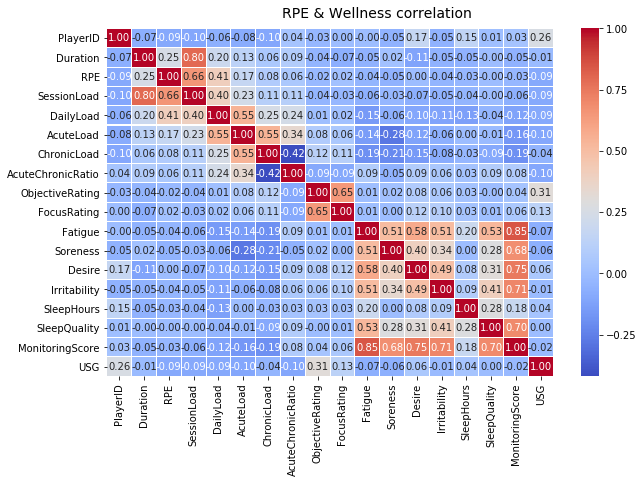

In [301]:
f, ax = plt.subplots(figsize=(10, 6))
corr = combined_RPE_WELL_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('RPE & Wellness correlation', fontsize=14)

In [302]:
print("converting nonnumeric columns to numberic")

converting nonnumeric columns to numberic


In [303]:
df_wellness['Nutrition'].unique()

array(['Excellent', nan, 'Okay', 'Poor'], dtype=object)

In [304]:
combined_RPE_WELL_df['Nutrition'] = combined_RPE_WELL_df['Nutrition'].replace(to_replace ="Excellent", 
                 value =3) 
combined_RPE_WELL_df['Nutrition'] = combined_RPE_WELL_df['Nutrition'].replace(to_replace ="Okay", 
                 value =2) 
combined_RPE_WELL_df['Nutrition'] = combined_RPE_WELL_df['Nutrition'].replace(to_replace ="Poor", 
                 value =1) 


In [305]:
combined_RPE_WELL_df['Nutrition'].unique()

array([ 3., nan,  2.,  1.])

In [306]:
combined_RPE_WELL_df['Pain'] = combined_RPE_WELL_df['Pain'].replace(to_replace ="Yes", 
                 value =1) 
combined_RPE_WELL_df['Pain'] = combined_RPE_WELL_df['Pain'].replace(to_replace ="No", 
                 value =0) 

In [307]:
combined_RPE_WELL_df['Illness'] = combined_RPE_WELL_df['Illness'].replace(to_replace ="Yes", 
                 value =1) 
combined_RPE_WELL_df['Illness'] = combined_RPE_WELL_df['Illness'].replace(to_replace ="No", 
                 value =0) 
combined_RPE_WELL_df['Illness'] = combined_RPE_WELL_df['Illness'].replace(to_replace ="Slightly Off", 
                 value =.5) 

In [308]:
combined_RPE_WELL_df['Menstruation'] = combined_RPE_WELL_df['Menstruation'].replace(to_replace ="Yes", 
                 value =1) 
combined_RPE_WELL_df['Menstruation'] = combined_RPE_WELL_df['Menstruation'].replace(to_replace ="No", 
                 value =0) 

In [309]:
combined_RPE_WELL_df['NutritionAdjustment'] = combined_RPE_WELL_df['NutritionAdjustment'].replace(to_replace ="Yes", 
                 value =1) 
combined_RPE_WELL_df['NutritionAdjustment'] = combined_RPE_WELL_df['NutritionAdjustment'].replace(to_replace ="No", 
                 value =0) 

In [310]:
# combined_RPE_WELL_df['TrainingReadiness'] = combined_RPE_WELL_df['TrainingReadiness'].replace(to_replace ="No", 
#                  value ="0") 
combined_RPE_WELL_df['TrainingReadiness'] = combined_RPE_WELL_df['TrainingReadiness'].str.rstrip('%').astype('float') / 100.0
combined_RPE_WELL_df['TrainingReadiness'].unique()

array([1.  , 0.  , 0.9 , 0.65, 0.95,  nan, 0.55, 0.6 , 0.5 , 0.85, 0.75,
       0.45, 0.8 , 0.7 , 0.35, 0.2 , 0.3 , 0.05, 0.4 , 0.1 , 0.15, 0.25])

In [311]:
combined_RPE_WELL_df['USGMeasurement'] = combined_RPE_WELL_df['USGMeasurement'].replace(to_replace ="Yes", 
                 value =1) 
combined_RPE_WELL_df['USGMeasurement'] = combined_RPE_WELL_df['USGMeasurement'].replace(to_replace ="No", 
                 value =0) 

In [312]:
combined_RPE_WELL_df['SessionType'] = combined_RPE_WELL_df['SessionType'].replace(to_replace ="Conditioning", 
                 value =1) 
combined_RPE_WELL_df['SessionType'] = combined_RPE_WELL_df['SessionType'].replace(to_replace ="Game", 
                 value =2) 
combined_RPE_WELL_df['SessionType'] = combined_RPE_WELL_df['SessionType'].replace(to_replace ="Strength", 
                 value =3) 
combined_RPE_WELL_df['SessionType'] = combined_RPE_WELL_df['SessionType'].replace(to_replace ="Combat", 
                 value =4) 
combined_RPE_WELL_df['SessionType'] = combined_RPE_WELL_df['SessionType'].replace(to_replace ="Speed", 
                 value =5) 
combined_RPE_WELL_df['SessionType'] = combined_RPE_WELL_df['SessionType'].replace(to_replace ="Skills", 
                 value =6) 
combined_RPE_WELL_df['SessionType'] = combined_RPE_WELL_df['SessionType'].replace(to_replace ="Mobility/Recovery", 
                 value =7) 

In [313]:
combined_RPE_WELL_df['SessionType'].unique()

array([ 7.,  2.,  6.,  1.,  3.,  4., nan,  5.])

In [314]:
combined_RPE_WELL_df['Training'] = combined_RPE_WELL_df['Training'].replace(to_replace ="Yes", 
                 value =1) 
combined_RPE_WELL_df['Training'] = combined_RPE_WELL_df['Training'].replace(to_replace ="No", 
                 value =0) 

In [315]:
combined_RPE_WELL_df['BestOutOfMyself'].unique()

array(['Not at all', 'Absolutely', nan, 'Somewhat'], dtype=object)

In [316]:
combined_RPE_WELL_df['BestOutOfMyself'] = combined_RPE_WELL_df['BestOutOfMyself'].replace(to_replace ="Not at all", 
                 value = 1) 
combined_RPE_WELL_df['BestOutOfMyself'] = combined_RPE_WELL_df['BestOutOfMyself'].replace(to_replace ="Somewhat", 
                 value = 2) 
combined_RPE_WELL_df['BestOutOfMyself'] = combined_RPE_WELL_df['BestOutOfMyself'].replace(to_replace ="Absolutely", 
                 value = 3) 

In [317]:
df_games['Outcome'] = df_games['Outcome'].replace(to_replace ="W", 
                 value =1) 
df_games['Outcome'] = df_games['Outcome'].replace(to_replace ="L", 
                 value =0) 

In [318]:
combined_RPE_WELL_df['BestOutOfMyself'].unique()

array([ 1.,  3., nan,  2.])

In [319]:

cols = ['PlayerID', 'Training', 'SessionType', 'Duration', 'RPE', 'ObjectiveRating', 'FocusRating', 'BestOutOfMyself', 'Fatigue', 'Soreness', 'Desire', 'Irritability', 'SleepHours', 'SleepQuality', 'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment', 'USGMeasurement', 'USG', 'TrainingReadiness']
condensed_data_RPE_WELL_DF =combined_RPE_WELL_df[cols]

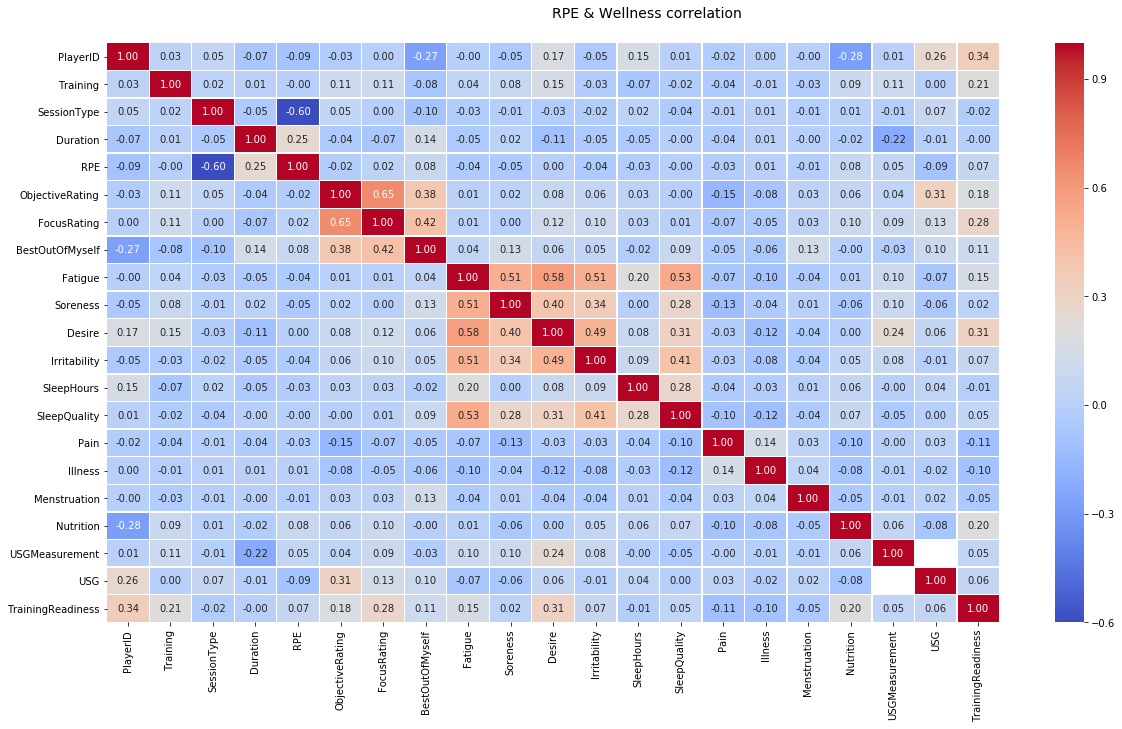

In [320]:
f, ax = plt.subplots(figsize=(20, 10))
corr = condensed_data_RPE_WELL_DF.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.3, xticklabels=True, yticklabels=True)
f.subplots_adjust(top=0.93)
t= f.suptitle('RPE & Wellness correlation', fontsize=14)

In [321]:
#remove nan values
condensed_data_RPE_WELL_DF_no_null = condensed_data_RPE_WELL_DF.dropna(subset=['Soreness'])
condensed_data_RPE_WELL_DF_no_null = condensed_data_RPE_WELL_DF.dropna(subset=['SleepQuality'])
condensed_data_RPE_WELL_DF_no_null = condensed_data_RPE_WELL_DF.dropna(subset=['Fatigue'])

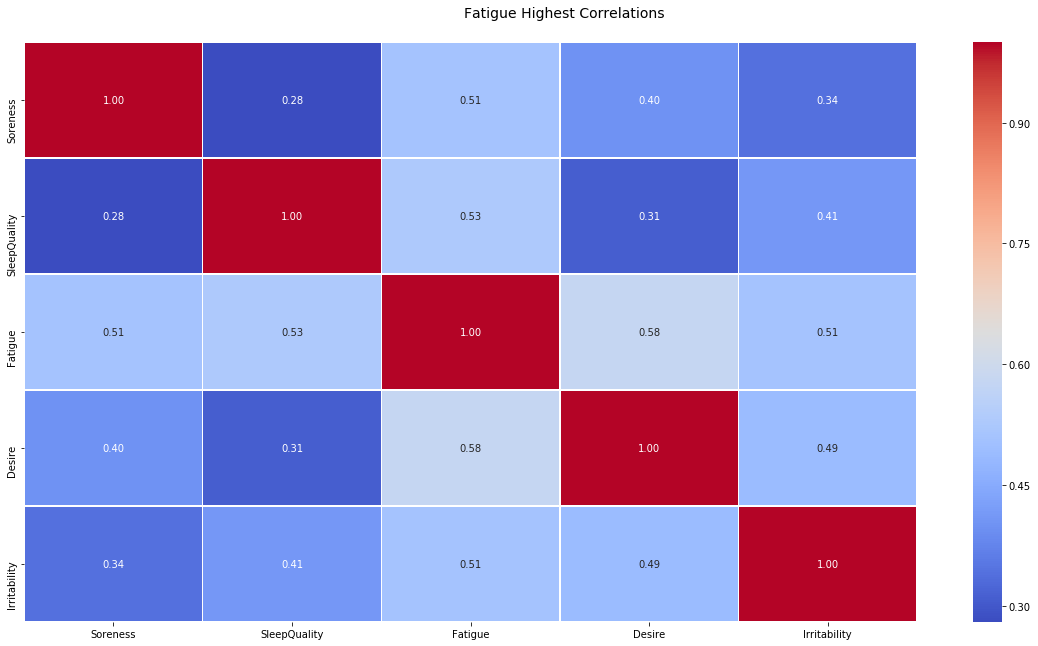

In [322]:

condensed_data_RPE_WELL_DF_new = condensed_data_RPE_WELL_DF[['Soreness','SleepQuality','Fatigue', 'Desire','Irritability']].copy()
f, ax = plt.subplots(figsize=(20, 10))
corr = condensed_data_RPE_WELL_DF_new.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.3, xticklabels=True, yticklabels=True)
f.subplots_adjust(top=0.93)
t= f.suptitle('Fatigue Highest Correlations', fontsize=14)

In [323]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

In [324]:
x = pd.DataFrame(np.c_[condensed_data_RPE_WELL_DF_no_null['Soreness'], condensed_data_RPE_WELL_DF_no_null['SleepQuality']], columns = ['Soreness','SleepQuality'])
y = condensed_data_RPE_WELL_DF_no_null['Fatigue']

In [325]:
from sklearn.model_selection import train_test_split

In [326]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [328]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [329]:
y_pred = lr.predict(x_test)

In [330]:
import matplotlib.pyplot as plt

In [331]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

0.5792633332196488


In [332]:
from sklearn.naive_bayes import GaussianNB

In [333]:
gnb = GaussianNB()

In [334]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [335]:
y_pred = gnb.predict(x_test)

Text(91.68, 0.5, 'Predicted')

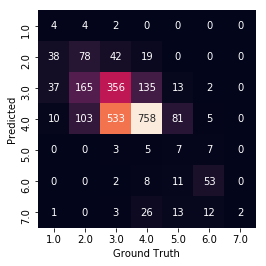

In [336]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred, y_test)
labels = np.unique(y_pred)
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')

In [337]:
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

0.9018912529550828


In [387]:
from sklearn.model_selection import cross_val_score
cross_val_score(gnb, x_test, y_test, cv=5, scoring="accuracy")

array([0.60869565, 0.54545455, 0.77272727, 0.54545455, 0.54545455])

In [339]:
y_pred

array([4., 3., 4., ..., 3., 4., 3.])

In [340]:
from sklearn.ensemble import RandomForestRegressor

In [341]:
rf = RandomForestRegressor()

In [342]:
rf.fit(x_train, y_train);

C:\Users\tholl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [343]:
y_pred = rf.predict(x_test)

In [344]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

0.5633240321413544


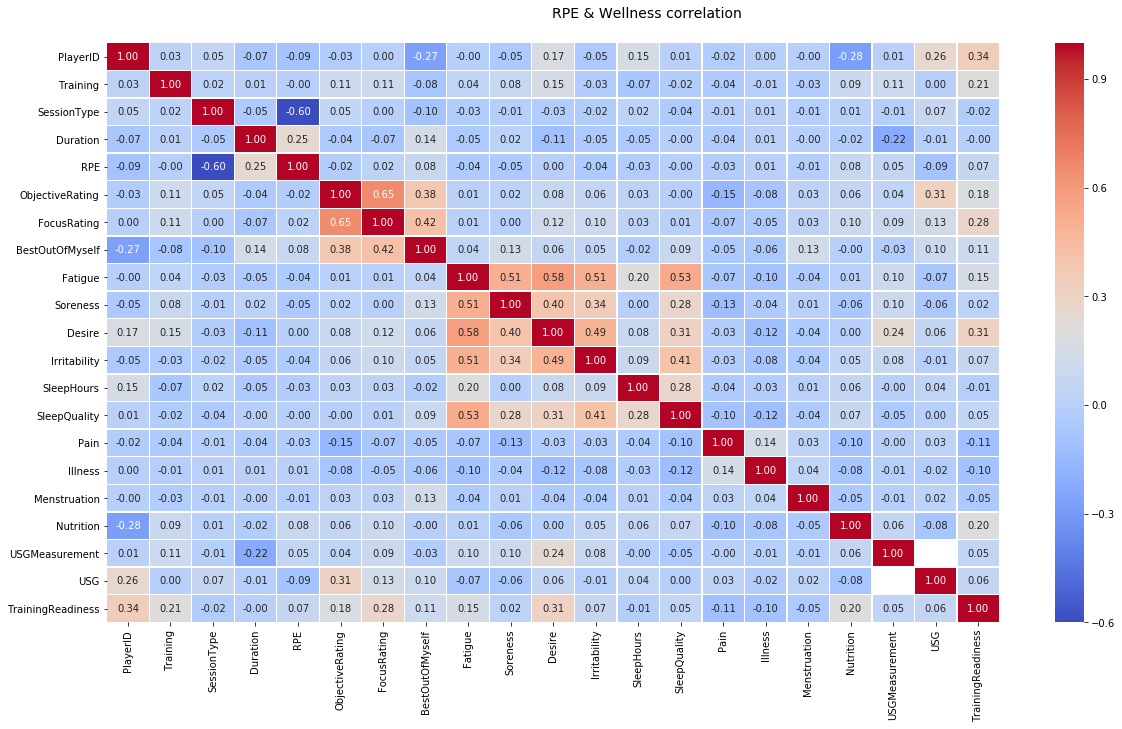

In [345]:
f, ax = plt.subplots(figsize=(20, 10))
corr = condensed_data_RPE_WELL_DF.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.3, xticklabels=True, yticklabels=True)
f.subplots_adjust(top=0.93)
t= f.suptitle('RPE & Wellness correlation', fontsize=14)

In [346]:
date_list = '2017-11-30', '2017-12-01', '2018-01-26', '2018-01-27','2018-01-28', '2018-04-13', '2018-04-14', '2018-04-15','2018-04-21', '2018-04-22', '2018-05-12', '2018-05-13','2018-06-08', '2018-06-09', '2018-06-10', '2018-07-20','2018-07-21'

In [347]:
df_RPE_WELL_GAME_DATE = pd.DataFrame()
for x in date_list:
    df_RPE_WELL_GAME_DATE.append(combined_RPE_WELL_df[combined_RPE_WELL_df['Date'] == x])
    print((combined_RPE_WELL_df[combined_RPE_WELL_df['Date'] == x]))
    print((x))

            Date  PlayerID  Training  SessionType  Duration  RPE  SessionLoad  \
5582  2017-11-30         1         1          1.0      60.0  4.0        240.0   
5583  2017-11-30         1         1          6.0      35.0  2.0         70.0   
5584  2017-11-30         1         1          3.0     120.0  7.0        840.0   
5585  2017-11-30         2         1          2.0      26.0  6.0        156.0   
5586  2017-11-30         2         1          7.0      30.0  1.0         30.0   
5587  2017-11-30         3         1          2.0      40.0  8.0        320.0   
5588  2017-11-30         3         1          2.0      40.0  8.0        320.0   
5589  2017-11-30         3         1          2.0      40.0  9.0        360.0   
5590  2017-11-30         3         1          7.0      30.0  1.0         30.0   
5591  2017-11-30         3         0          1.0      30.0  5.0        150.0   
5592  2017-11-30         4         1          2.0      32.0  5.0        160.0   
5593  2017-11-30         4  

[42 rows x 31 columns]
2018-06-08
           Date  PlayerID  Training  SessionType  Duration  RPE  SessionLoad  \
835  2018-06-09         3         1          6.0      60.0  6.0        360.0   
836  2018-06-09         3         1          2.0      14.0  1.0        140.0   
837  2018-06-09         3         1          7.0      30.0  2.0         60.0   
838  2018-06-09         7         1          6.0      40.0  4.0        160.0   
839  2018-06-09         7         1          2.0      14.0  8.0        112.0   
840  2018-06-09         7         1          2.0      13.0  9.0        117.0   
841  2018-06-09         8         1          2.0      37.0  7.0        259.0   
842  2018-06-09         8         1          2.0      33.0  3.0         99.0   
843  2018-06-09        11         1          2.0      11.0  1.0        110.0   
844  2018-06-09        11         1          2.0      11.0  1.0        110.0   
845  2018-06-09        11         1          7.0      45.0  2.0         90.0   
846  2

In [348]:
df_RPE_WELL_GAME_DATE = combined_RPE_WELL_df[combined_RPE_WELL_df['Date'].isin(date_list)]

In [349]:
df_RPE_WELL_GAME_DATE.to_csv('df_RPE_WELL_GAME_DATE.csv', sep='\t')

In [350]:
combined_RPE_WELL_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8860 entries, 0 to 8859
Data columns (total 31 columns):
Date                   8860 non-null object
PlayerID               8860 non-null int64
Training               8860 non-null int64
SessionType            7621 non-null float64
Duration               7621 non-null float64
RPE                    7621 non-null float64
SessionLoad            7621 non-null float64
DailyLoad              3149 non-null float64
AcuteLoad              4349 non-null float64
ChronicLoad            4383 non-null float64
AcuteChronicRatio      4349 non-null float64
ObjectiveRating        4724 non-null float64
FocusRating            4751 non-null float64
BestOutOfMyself        3019 non-null float64
Fatigue                8460 non-null float64
Soreness               8460 non-null float64
Desire                 8460 non-null float64
Irritability           8460 non-null float64
BedTime                8460 non-null object
WakeTime               8460 non-null object


In [351]:
df_RPE_WELL_GAME_DATE.head()

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,...,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,13,1,7.0,5.0,0.0,0.0,446.0,323.1,303.25,...,4.0,20.0,0.0,0.0,0.0,3.0,1,1.0,1.025,1.0
1,2018-07-21,13,1,2.0,29.0,7.0,203.0,NaN,NaN,NaN,...,4.0,20.0,0.0,0.0,0.0,3.0,1,1.0,1.025,1.0
2,2018-07-21,13,1,2.0,27.0,9.0,243.0,NaN,NaN,NaN,...,4.0,20.0,0.0,0.0,0.0,3.0,1,1.0,1.025,1.0
3,2018-07-20,11,1,2.0,36.0,6.0,216.0,534.0,256.3,344.18,...,4.0,22.0,0.0,0.5,0.0,3.0,1,1.0,1.016,1.0
4,2018-07-20,11,1,2.0,36.0,8.0,288.0,NaN,NaN,NaN,...,4.0,22.0,0.0,0.5,0.0,3.0,1,1.0,1.016,1.0


In [352]:
df_games_date_win = pd.concat([df_games['Date'], df_games['Outcome']], axis=1, keys=['Date', 'Outcome'])

In [353]:
d = {'Date': ['1'], 'Outcome': [1]}
df_games_prep = pd.DataFrame(data=d)
for x in date_list:
    df_games_by_win = df_games[df_games['Date'] == x]
    result = df_games_by_win["Outcome"].mean()
    if result > .5:
        print(type(x))
        d = {'Date': [x], 'Outcome': [1]}
        print(d)
        games_temp_df = pd.DataFrame(data=d)
        print(games_temp_df)
        df_games_prep.append(games_temp_df)
    else:
        d = {'Date': [x], 'Outcome': [0]}
        print(d)
        games_temp_df = pd.DataFrame(data=d)
        print('-----------', games_temp_df)
        df_games_prep.append(games_temp_df)
        
df_games_prep.head()
        


<class 'str'>
{'Date': ['2017-11-30'], 'Outcome': [1]}
         Date  Outcome
0  2017-11-30        1
{'Date': ['2017-12-01'], 'Outcome': [0]}
-----------          Date  Outcome
0  2017-12-01        0
<class 'str'>
{'Date': ['2018-01-26'], 'Outcome': [1]}
         Date  Outcome
0  2018-01-26        1
{'Date': ['2018-01-27'], 'Outcome': [0]}
-----------          Date  Outcome
0  2018-01-27        0
<class 'str'>
{'Date': ['2018-01-28'], 'Outcome': [1]}
         Date  Outcome
0  2018-01-28        1
<class 'str'>
{'Date': ['2018-04-13'], 'Outcome': [1]}
         Date  Outcome
0  2018-04-13        1
{'Date': ['2018-04-14'], 'Outcome': [0]}
-----------          Date  Outcome
0  2018-04-14        0
{'Date': ['2018-04-15'], 'Outcome': [0]}
-----------          Date  Outcome
0  2018-04-15        0
{'Date': ['2018-04-21'], 'Outcome': [0]}
-----------          Date  Outcome
0  2018-04-21        0
{'Date': ['2018-04-22'], 'Outcome': [0]}
-----------          Date  Outcome
0  2018-04-22        0
<c

,Date,Outcome
0,1,1


In [354]:
df_wellness_rpe_winrate = pd.read_csv("wellness_rpe_winrate.csv", header=0)
df_wellness_rpe_winrate.shape

(428, 34)

In [355]:
df_wellness_rpe_winrate.head()

,Date,Winning_day,X1,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,...,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness,as.Date(Date)
0,2017-11-3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-1,0,5536.0,1.0,1.0,1.0,60.0,3.0,180.0,555.0,...,16.0,0.0,0.0,0.0,3.0,1,0.0,NaN,0.9,2017-12-01
2,2017-12-1,0,5537.0,1.0,1.0,3.0,75.0,5.0,375.0,NaN,...,16.0,0.0,0.0,0.0,3.0,1,0.0,NaN,0.9,2017-12-01
3,2017-12-1,0,5538.0,3.0,1.0,2.0,40.0,1.0,400.0,1120.0,...,21.0,0.0,0.0,0.0,3.0,1,1.0,1.015,1.0,2017-12-01
4,2017-12-1,0,5539.0,3.0,1.0,2.0,40.0,9.0,360.0,NaN,...,21.0,0.0,0.0,0.0,3.0,1,1.0,1.015,1.0,2017-12-01


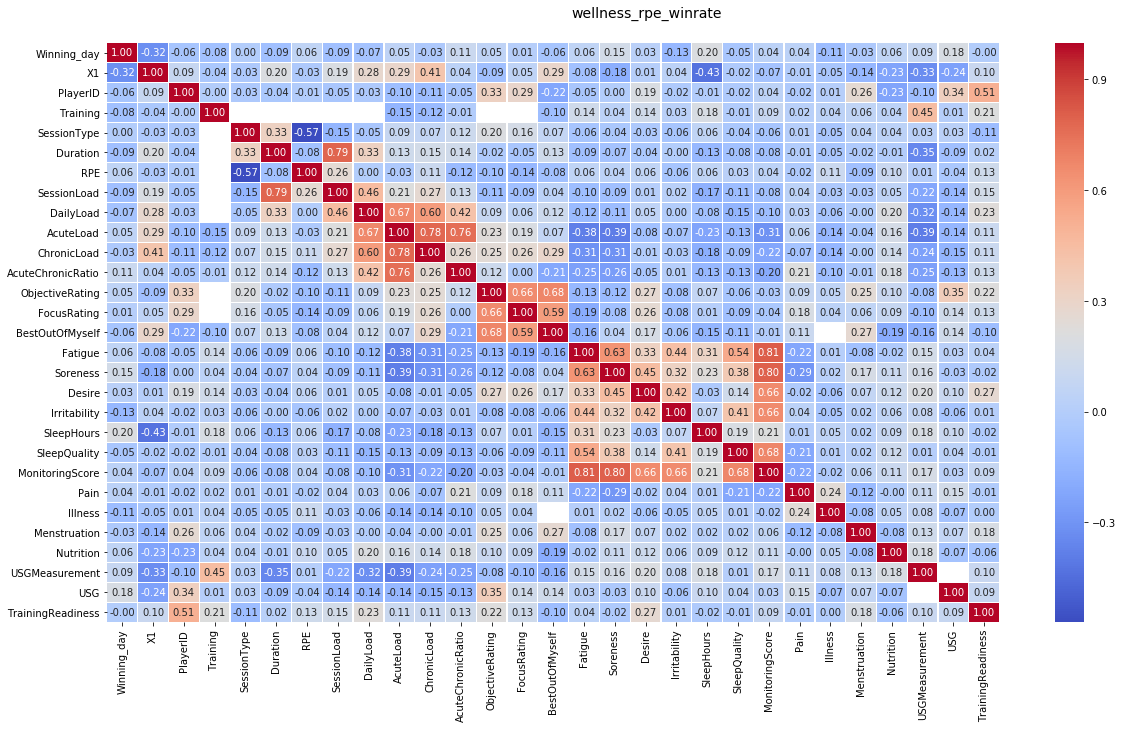

In [356]:
f, ax = plt.subplots(figsize=(20, 10))
corr = df_wellness_rpe_winrate.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.3, xticklabels=True, yticklabels=True)
f.subplots_adjust(top=0.93)
t= f.suptitle('wellness_rpe_winrate', fontsize=14)

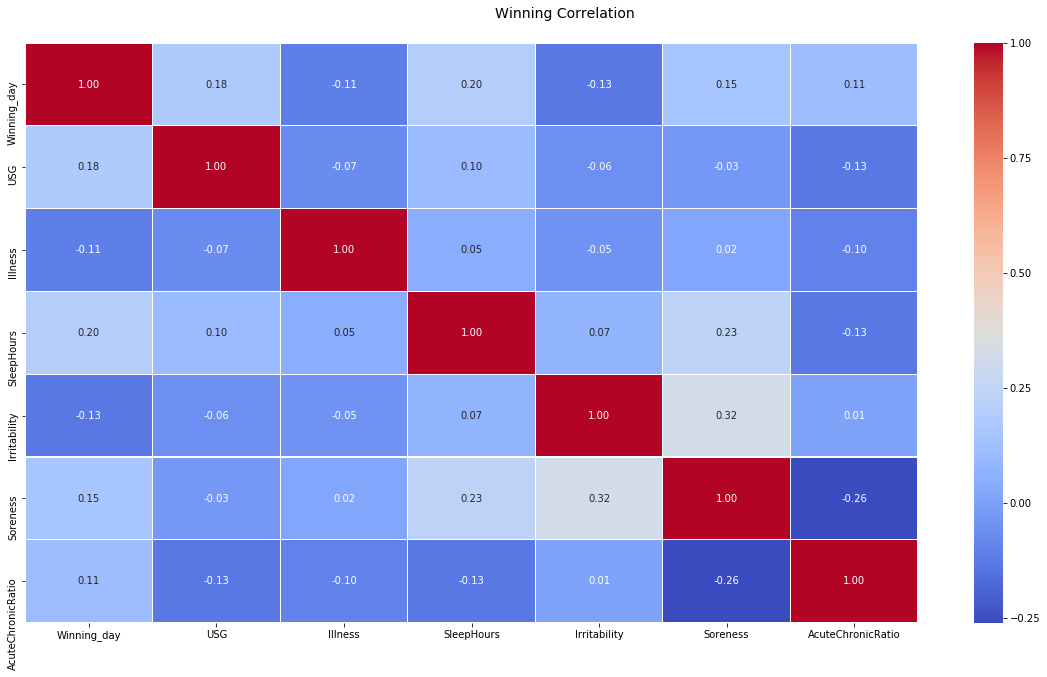

In [357]:
df_wellness_rpe_winrate_new = df_wellness_rpe_winrate[['Winning_day', 'USG','Illness','SleepHours', 'Irritability','Soreness', 'AcuteChronicRatio']].copy()
f, ax = plt.subplots(figsize=(20, 10))
corr = df_wellness_rpe_winrate_new.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.3, xticklabels=True, yticklabels=True)
f.subplots_adjust(top=0.93)
t= f.suptitle('Winning Correlation', fontsize=14)

In [358]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

In [359]:
df_wellness_rpe_winrate = df_wellness_rpe_winrate.dropna(subset=['USG'])
df_wellness_rpe_winrate = df_wellness_rpe_winrate.dropna(subset=['Illness'])
df_wellness_rpe_winrate = df_wellness_rpe_winrate.dropna(subset=['SleepHours'])
df_wellness_rpe_winrate = df_wellness_rpe_winrate.dropna(subset=['Irritability'])
df_wellness_rpe_winrate = df_wellness_rpe_winrate.dropna(subset=['Soreness'])
#df_wellness_rpe_winrate = df_wellness_rpe_winrate.dropna(subset=['AcuteChronicRatio'])
df_wellness_rpe_winrate = df_wellness_rpe_winrate.dropna(subset=['Winning_day'])
df_wellness_rpe_winrate.shape

(368, 34)

In [360]:
x = pd.DataFrame(np.c_[df_wellness_rpe_winrate['USG'], df_wellness_rpe_winrate['Illness'], df_wellness_rpe_winrate['SleepHours'], df_wellness_rpe_winrate['Irritability'], df_wellness_rpe_winrate['Soreness']], columns = ['USG','Illness','SleepHours','Irritability','Soreness'])
y = df_wellness_rpe_winrate['Winning_day']

In [361]:
from sklearn.model_selection import train_test_split

In [362]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

In [363]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [364]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [365]:
y_pred = lr.predict(x_test)

In [366]:
import matplotlib.pyplot as plt

In [367]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

0.17390633772937544


In [368]:
from sklearn.naive_bayes import GaussianNB

In [369]:
gnb = GaussianNB()

In [370]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [371]:
y_pred = gnb.predict(x_test)

In [386]:
y_pred

array([0.1       , 1.        , 0.8       , 1.        , 1.        ,
       0.9       , 0.7       , 0.5       , 0.8       , 1.        ,
       1.        , 1.        , 0.4       , 0.9       , 0.8       ,
       1.        , 0.9       , 0.2       , 0.3       , 1.        ,
       1.        , 0.        , 0.        , 0.1       , 0.1       ,
       1.        , 1.        , 0.8       , 1.        , 0.9       ,
       1.        , 1.        , 0.1       , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.8       , 0.255     ,
       0.9       , 1.        , 1.        , 0.33459207, 1.        ,
       1.        , 1.        , 1.        , 0.9       , 1.        ,
       1.        , 0.9       , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.7       , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.255     , 0.2       , 0.2       ,
       1.        , 1.        , 0.9       , 0.1       , 0.9    

Text(91.68, 0.5, 'Predicted')

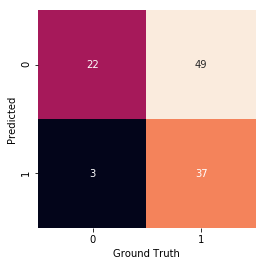

In [372]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred, y_test)
labels = np.unique(y_pred)
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')

In [380]:
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

0.06543079015491603


In [385]:
from sklearn.model_selection import cross_val_score
cross_val_score(gnb, x_test, y_test, cv=4, scoring="accuracy")

array([0.34482759, 0.67857143, 0.62962963, 0.51851852])

In [375]:
from sklearn.ensemble import RandomForestRegressor

In [376]:
rf = RandomForestRegressor()#n_estimators = 1000, random_state = 42

In [377]:
rf.fit(x_train, y_train);

C:\Users\tholl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [378]:
y_pred = rf.predict(x_test)

In [379]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

0.06543079015491603
